In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from scipy.optimize import curve_fit
from scipy.constants import k as kb
from scipy.constants import hbar, m_p, h
import os, copy
from matplotlib.gridspec import GridSpec
LS_LIST = ["-", "--", ":", "-."]*10
from heliumtools.bec import *

## Exmple of how the class works

In [2]:
bec = Gaussian_BEC()
# bec.set_longitudinal_freq(7)
# bec.asn1 = 1.2
bec.set_transverse_freq(1.03e3)
bec.set_longitudinal_freq(30)
bec.set_sound_speed_from_parametric_resonance(16.3/2/1000)
bec.temperature = 33e-9 # Kelvin
### SHOW INFORMATIONS
bec.show_bec_info()
bec.get_phonon_population(16.3/2/1000)
v = 16.3/2/1000
k = bec._m * v / hbar
print(k*bec._xi)
print(bec.get_phonon_population_from_energy(bec._omega_perp * hbar))
print(bec.get_phonon_population(16.3/2/1000))
print(bec.get_phonon_group_speed(v)*1e3)

INFO:Gas parameters in Gaussian ansatz 
1D parameters is asn1 = 2.1e+00 (asN/L=1.3e+00) and chi = 4.0e+01
It is a trap of 39344 bosons with frequency 30.0 Hz and
1.03 kHz.The peak atomic density is 4.03e+13 at/cm^3
The BEC length is 218 µm with a radius of 2.7 µm.
It can be compared to the correlation radius 2197.9 µm 
The interparticle mean distance is 549.5 nm
that should be compare to 7 nm scattering length.
The healing length is 0.942 µm and the sound speed 11.834 mm/s.
The lieb liniger parameter is gamma = 6.2e-06
and the ratio kbT/mc2 = 0.49.


0.48696259638003
0.28797769293193604
0.28797769293193604
13.843069040297589


## Profil de densité pour différents BEC

In [3]:
bec = Gaussian_BEC()
bec.set_longitudinal_freq(30)
bec.set_transverse_freq(1000)
bec.asn1 = 1.3
bec.show_bec_info()

INFO:Gas parameters in Gaussian ansatz 
1D parameters is asn1 = 1.3e+00 (asN/L=7.9e-01) and chi = 1.9e+01
It is a trap of 20640 bosons with frequency 30.0 Hz and
1.00 kHz.The peak atomic density is 2.97e+13 at/cm^3
The BEC length is 182 µm with a radius of 2.5 µm.
It can be compared to the correlation radius 1490.6 µm 
The interparticle mean distance is 604.3 nm
that should be compare to 7 nm scattering length.
The healing length is 1.096 µm and the sound speed 10.169 mm/s.
The lieb liniger parameter is gamma = 1.2e-05
and the ratio kbT/mc2 = 0.60.


In [4]:
bec = Gaussian_BEC()
bec.set_longitudinal_freq(7)
bec.set_transverse_freq(1300)
bec.asn1 = 1.2
bec.show_bec_info()


INFO:Gas parameters in Gaussian ansatz 
1D parameters is asn1 = 1.2e+00 (asN/L=7.3e-01) and chi = 1.7e+01
It is a trap of 90786 bosons with frequency 7.0 Hz and
1.30 kHz.The peak atomic density is 3.69e+13 at/cm^3
The BEC length is 866 µm with a radius of 2.2 µm.
It can be compared to the correlation radius 1376.0 µm 
The interparticle mean distance is 561.8 nm
that should be compare to 7 nm scattering length.
The healing length is 0.984 µm and the sound speed 11.327 mm/s.
The lieb liniger parameter is gamma = 1.8e-05
and the ratio kbT/mc2 = 0.48.


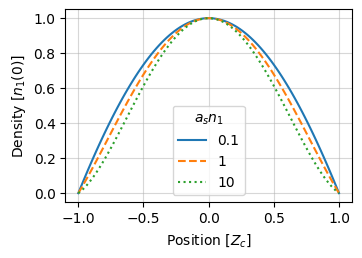

In [5]:

bec =Gaussian_BEC()
fig, ax1 = plt.subplots(figsize = (3.7,2.5))
for i, asn1 in enumerate([0.1, 1, 10]):
    bec.asn1 = asn1
    radius = bec._length/2
    z = np.linspace(-radius, radius, 101) 
    ax1.plot(z/radius,bec.evaluate_1D_density(z)/bec.asn1, ls = LS_LIST[i],
             label = str(asn1))

ax1.set_xlabel('Position [$Z_c$]')
ax1.set_ylabel('Density [$n_1(0)$]')
ax1.legend(title = "$a_sn_1$")
ax1.grid(True, alpha = 0.5)
plt.show()


598


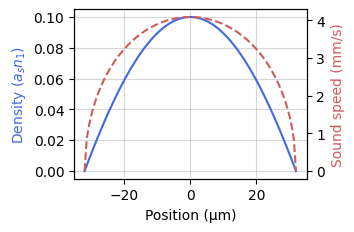

In [6]:

bec =Gaussian_BEC()
bec.asn1 = 0.1
print(bec._Nat)
fig, ax1 = plt.subplots(figsize = (3,2.2))
radius = bec._length/2
z = np.linspace(-radius, radius, 101)
ax1.set_xlabel('Position (µm)')
color="royalblue"
ax1.set_ylabel('Density ($a_sn_1$)', color = color)
ax1.plot(z*1e6,bec.evaluate_1D_density(z),color = color )
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
color = "indianred"
ax2.set_ylabel("Sound speed (mm/s)", color = color)
ax2.plot(z*1e6, bec.evaluate_local_speed_of_sound(z)*1e3, color = color, ls = "--")
ax1.grid(True, alpha = 0.5)
plt.show()


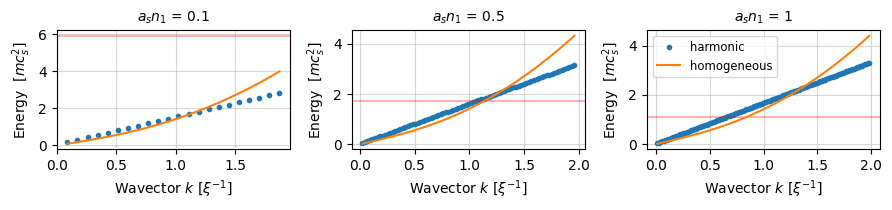

In [7]:
bec =Gaussian_BEC()
ncols = 3
fig, axes = plt.subplots(figsize = (3*ncols,2.2), ncols = ncols)

for i, asn1 in enumerate([0.1, 0.5, 1]):
    bec.asn1 = asn1
    nu_max = int(2 * bec._length/2/bec._xi)
    nu = np.arange(1, nu_max, 1)
    ax1 = axes[i]
    energy_scale = bec._mc2 /hbar
    ome = bec.get_bogoliubov_spectrum(nu)
    ax1.plot(nu * bec._xi/(bec._length/2), ome/energy_scale, ".", label = "harmonic")
    ome2 = bec.get_homogeneous_bogoliubov_spectrum(nu)
    # on représente la limite des excitations transverses
    ax1.axhline(bec.omega_perp/energy_scale, c = "red", alpha = 0.3)
    ax1.plot(nu * bec._xi/(bec._length/2), ome2/energy_scale, "-", label = "homogeneous")
    ax1.grid(True, alpha = 0.5)
    ax1.set_xlabel("Wavector $k$ $[\\xi^{-1}]$")
    ax1.set_ylabel("Energy  $[mc_s^2]$")
    ax1.set_title("$a_sn_1$ = "+str(asn1), fontsize = "medium")
ax1.legend(fontsize = "small")
plt.tight_layout()
plt.show()

11.732035733986699


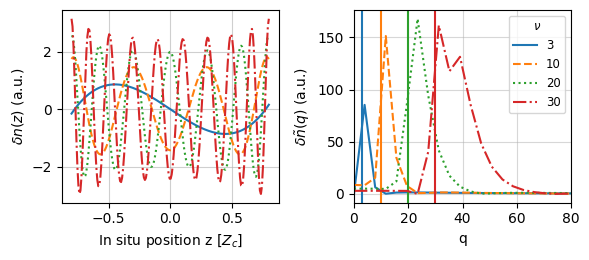

In [8]:
bec =Gaussian_BEC()
bec.asn1 = 0.1
fig, (ax, ax2) = plt.subplots(figsize = (3*2,2.7), ncols = 2)
for i, nu in enumerate([3, 10, 20, 30]):
    z = np.linspace(-0.8, 0.8, 200)
    excitation =  bec.get_excitation_form( z =  z, nu = nu)
    ax.plot(z,excitation, label = nu, ls  = LS_LIST[i])
    fourier = np.fft.fft(excitation)
    q = 2*np.pi * np.fft.fftfreq(excitation.size, d=z[1]-z[0])
    q = q[0:excitation.size//2]#*bec._xi/bec._length*2
    fourier = fourier[0:excitation.size//2]
    ax2.plot(q, np.abs(fourier), label = nu, ls  = LS_LIST[i])
    ax2.axvline(nu,color = "C"+str(i))
ax.grid(True, alpha = 0.6)
ax2.grid(True, alpha = 0.5)
print(1/(2*bec._xi/bec._length))
ax2.legend(fontsize = "small", title_fontsize = "small", title = "$\\nu$")
ax.set_xlabel("In situ position z [$Z_c$]")
ax.set_ylabel("$\delta n (z)$ (a.u.)")
ax2.set_ylabel("$\delta \\tilde{n}(q)$ (a.u.)")
ax2.set_xlim([0, 80])
ax2.set_xlabel("q")
plt.tight_layout()

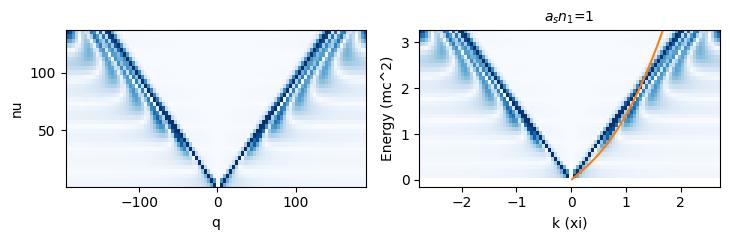

In [329]:
nu_max = int(2 * bec._length/2/bec._xi)

step = max(nu_max//30,1)
data = []
bec.asn1 = 1
nu_list = np.arange(1,nu_max, step)
for i, nu in enumerate(nu_list):
    nu = int(nu)
    energy = np.sqrt(nu*(nu+1)/2)*bec._omega_z
    z = np.linspace(-0.8, 0.8, 100)
    excitation =  bec.get_excitation_form( z =  z, nu = nu)**1
    excitation = scipy.special.eval_legendre(nu,z)
    fourier = np.abs(np.fft.fft(excitation))
    freq = 2*np.pi*np.fft.fftfreq(excitation.size, d=z[1]-z[0])
    # freq = freq[0:excitation.size//2]
    # fourier = np.abs(fourier[0:excitation.size//2])
    data.append(pd.DataFrame({
        "nu":nu*np.ones(fourier.shape),
        "Energy (rad)":energy*np.ones(fourier.shape),
        "Energy (Hz)":energy*np.ones(fourier.shape)/2/np.pi,
        "Energy (mc^2)":hbar*energy/bec._mc2*np.ones(fourier.shape),
        "k (xi)":freq*bec._xi/bec._length*2,
        "q":freq,
        "Amplitude (a.u.)":fourier,
        "Normalized amplitude (a.u.)":fourier/np.max(fourier)

    }))

df = pd.concat(data)

## figure
columns = "q"
index = "nu"
d2 = pd.pivot_table(df, values="Normalized amplitude (a.u.)",
                     index=index, columns=columns)
d2 = np.flip(d2.to_numpy(), axis=0)
ncols =2
fig, axes = plt.subplots(figsize = (3.7*ncols, 2.5), ncols = 2)
for i, ( columns, index) in enumerate(zip(["q", "k (xi)"], ["nu", "Energy (mc^2)"])):
    # plot heatmap
    ax = axes[i]
    xmin = np.min(df[columns])
    xmax = np.max(df[columns])
    ymin = np.min(df[index])
    ymax = np.max(df[index])
    img = ax.imshow(d2, extent=[xmin, xmax, ymin, ymax],
                    aspect='auto',cmap = "Blues")
    # ax.invert_yaxis()

    
    # on représente la limite des excitations transverses
    
    # plt.plot(nu_list ,%* bec._xi/(bec._length/2), 
    #          ome2/energy_scale, "-", label = "homogeneous")
    ax.set_xlabel(columns)
    # ax.set_xlim([0, 2.3])
    ax.set_ylabel(index)
ax.set_title("$a_sn_1$="+str(bec._asn1), fontsize = "medium")
q_vector =  nu_list/bec._length*2
kxi = q_vector*bec._xi
energy_scale = bec._mc2 /hbar
# on représente la limite des excitations transverses
# ax.axhline(bec.omega_perp/energy_scale, c = "red", alpha = 0.3)
ome2 = bec.get_homogeneous_bogoliubov_spectrum(nu = nu_list)/energy_scale
bool_array = ome2 < ymax
ax.plot(nu_list[bool_array] * bec._xi/(bec._length/2),
         ome2[bool_array], color = "C1",
         ls = "-", label = "homogeneous")# axes[1].plot(kxi,
plt.tight_layout()
plt.show()